In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
# Reads results csv files into df
def read_csv(path):
    csv_files = glob.glob(path + "/*.csv")
    df_list = (pd.read_csv(file) for file in csv_files)
    full_df = pd.concat(df_list, ignore_index=True)
    full_df.columns = [c.replace(' ', '_') for c in full_df.columns]
    return full_df

In [42]:
def mov_avg(data):
    data = np.array(data)
    window_width = 500
    cumsum_vec = np.cumsum(np.insert((data), 0, 0))
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

In [56]:
def plot_avg(dfs):
    reward_nex = []
    reward_out = []
    reward_disc = []
    r_nex = -50
    r_disc = -11
    for df in dfs:
        reward_nex.append(r_nex * df['issued_but_nonexistent'])
        reward_out.append(-1 * df['issued_but_nonexistent'])
        reward_disc.append(r_disc * df['issued_but_nonexistent'])

    return np.mean(np.stack(reward_nex), 0), np.mean(np.stack(reward_out), 0), np.mean(np.stack(reward_disc), 0)

    # plt.plot(mov_avg(np.mean(np.stack(reward_nex), 0)), label='non-existing')
    # plt.plot(mov_avg(np.mean(np.stack(reward_out), 0)), label='outdated')
    # plt.plot(mov_avg(np.mean(np.stack(reward_disc), 0)), label='discarded')
    #
    #

    # x = [*range(0, len(df), 982)]
    # [plt.axvline(_x, linewidth=0.40, color='b') for _x in x]
    #
    # plt.legend(loc="lower right")
    #
    # plt.xlabel('Days')
    # plt.ylabel('Reward')
    # plt.tight_layout()
    #
    # plt.show()

In [93]:
def plot_multi(dfs):
    r_nex = -50
    r_disc = -11

    cols = 2
    rows = math.ceil(len(dfs) / cols)
    width = 12
    if rows == 1:
        width = 6

    fig, axes = plt.subplots(rows, cols, figsize=(16, width), squeeze=False)

    l = 0
    for i in range(rows):
        for j in range(cols):
            if len(dfs) == l:
                break
            else:

                r1, r2, r3 = plot_avg(dfs[l])

                axes[i][j].plot(mov_avg(r1), label='discarded')
                axes[i][j].plot(mov_avg(r2), label='non-existing')
                axes[i][j].plot(mov_avg(r3), label='outdated')

                axes[i][j].set(xlabel="Days", ylabel="Reward")
                axes[i][j].legend(loc='lower right')

                # Plot episode lines
                x = [*range(0, len(dfs[l][l]), 982)]
                [axes[i][j].axvline(_x, linewidth=0.40, color='b') for _x in x]

            l += 1
    plt.tight_layout()
    plt.show()

### Network architecture
#### Input size

```
input_size = len(np.ravel(self.env.state))
```

We reduced the state space to an 8 x 9 matrix.
Max age of a unit = 5 (0-4)
Max lead time = 3 (0-2)


output = number of actions (8)
state dimension = 8 x 8
8:   number of blood groups
9:   max age (5) + max lead time (3) + current request (1)

input
size = 8 * 9 = 72

#### Model
```
input -> [128, relu] -> [128, relu] -> [128, relu] -> [output, linear]
```

### 1 Learning rate tests

Episode = 2.5 years
15 episodes

In [78]:
# Learning rate = 0.01
a0_01_train_k1 = read_csv(
    'results/request_scratch/a0.01_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k1')
a0_01_train_k2 = read_csv(
    'results/request_scratch/a0.01_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k2')
a0_01_train_k3 = read_csv(
    'results/request_scratch/a0.01_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k3')

a0_001_train_k1 = read_csv(
    'results/request_scratch/a0.001_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k1')
a0_001_train_k2 = read_csv(
    'results/request_scratch/a0.001_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k2')
a0_001_train_k3 = read_csv(
    'results/request_scratch/a0.001_g0.98_b50/128_128_128/e1_target_True_freq_100_exp_500/train_k3')

a0_01_train = [a0_01_train_k1, a0_01_train_k2, a0_01_train_k3]
a0_001_train = [a0_001_train_k1, a0_001_train_k2, a0_001_train_k3]

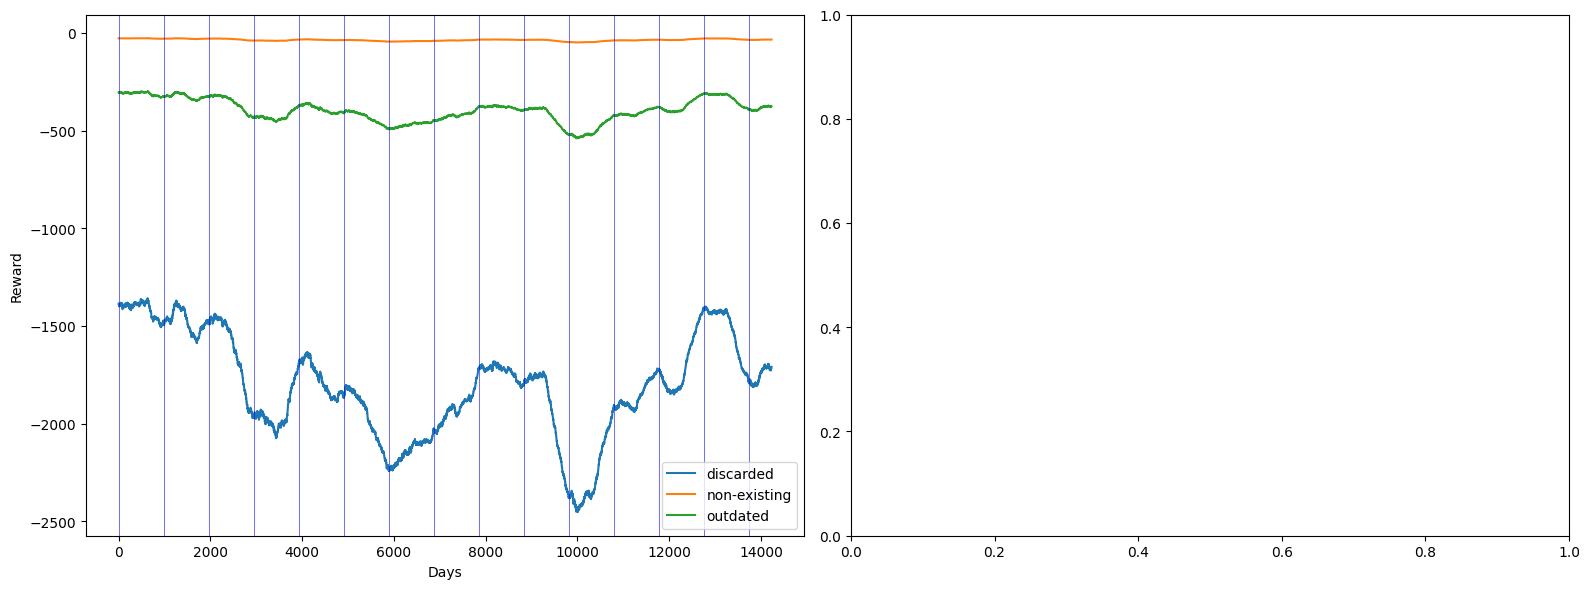

In [94]:
plot_multi([a0_01_train])